# **Exploratory Data Analysis (EDA) - Portuguese Real Estate Market**

## Project context

This notebook contains an exploratory data analysis (EDA) of a real estate listings dataset from Portugal.  
The dataset includes over 130,000 property listings with information about prices, locations, property types, sizes, construction year, energy efficiency, and available amenities.

The main goal of this project is to build a machine learning system for real estate price prediction.  
This EDA serves as a foundation for understanding the data, identifying data quality issues, and designing an appropriate data preprocessing and feature engineering pipeline.

## Objectives of this EDA

The objectives of this exploratory analysis are:

- Understand the structure and content of the dataset
- Assess data quality (missing values, duplicates, outliers, invalid values)
- Analyze the distribution of the target variable (Price)
- Explore relationships between price and key numerical features (areas, rooms, year, etc.)
- Explore the impact of categorical features (location, property type, energy certificate, etc.)
- Identify which features are useful, redundant, or problematic
- Define a clear data cleaning and preprocessing strategy for modeling

## Expected outcome

At the end of this EDA, we should:

- Have a clear understanding of the dataset and its limitations
- Decide which features will be used in the baseline model
- Decide how to handle missing values and outliers
- Decide how to transform the target variable and selected features
- Define a reproducible preprocessing plan for the training pipeline


## 1. Import Libraries and Load Data

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Show current working directory
print("Current working directory:", os.getcwd())

# If running from notebooks/ folder, go to project root
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    print("Changed working directory to:", os.getcwd())

# List files in data directory
print("Files in data directory:", os.listdir("data"))

Current working directory: c:\projetcs\real-estate-ml-system\notebooks
Changed working directory to: c:\projetcs\real-estate-ml-system
Files in data directory: ['.gitkeep', 'portugal_listings.csv']


In [4]:
df = pd.read_csv("data/portugal_listings.csv")

# Basic check
print("Dataset shape:", df.shape)
df.sample(5)

Dataset shape: (135536, 25)


C:\Users\jakub\AppData\Local\Temp\ipykernel_18532\392697864.py:1: DtypeWarning: Columns (9,10,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/portugal_listings.csv")


,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
19281,435000.0,Castelo Branco,Castelo Branco,Castelo Branco,Farm,NC,NaN,127375.0,2.0,True,...,False,NaN,NaN,NaN,NaN,NaN,127375.0,NaN,NaN,0.0
116224,1000000.0,Faro,Loulé,São Clemente,House,A,NaN,284.0,0.0,NaN,...,False,True,NaN,4.0,0.0,NaN,256.0,NaN,NaN,2.0
112469,40000.0,Viana do Castelo,Ponte de Lima,Cabaços e Fojo Lobal,Land,NC,NaN,4907.0,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,4907.0,NaN,0.0
37035,378000.0,Lisboa,Odivelas,Odivelas,Apartment,C,NaN,105.0,2.0,True,...,True,NaN,2.0,NaN,NaN,NaN,137.0,NaN,NaN,2.0
8659,1245000.0,Lisboa,Lisboa,Parque das Nações,Apartment,C,231.0,0.0,3.0,True,...,True,NaN,4.0,NaN,NaN,NaN,156.0,NaN,NaN,3.0


## Appendix A - Description of the column names 

| Column | Description |
|--------|-------------|
| Price | Listing price in EUR |
| LogPrice | Log-transformed price used as target variable |
| District | Administrative district of the property |
| City | City where the property is located |
| Town | Town or municipality |
| Type | Type of property (e.g. Apartment, House, Land, etc.) |
| EnergyCertificate | Energy certificate category |
| EnergyEfficiencyLevel | Energy efficiency level |
| GrossArea | Gross private area of the property |
| LivingArea | Usable living area |
| TotalArea | Total area of the property |
| BuiltArea | Built area |
| LotSize | Land / lot size |
| Floor | Floor number |
| ConstructionYear | Year of construction |
| TotalRooms | Total number of rooms |
| NumberOfBedrooms | Number of bedrooms |
| NumberOfBathrooms | Number of bathrooms |
| NumberOfWC | Number of toilets |
| Parking | Number of parking spaces |
| HasParking | Whether the property has parking |
| Garage | Whether the property has a garage |
| Elevator | Whether the building has an elevator |
| ElectricCarsCharging | Whether electric car charging is available |
| ConservationStatus | Condition of the property |
| PublishDate | Listing publication date |


## 2. Basic Overwiew of the Dataset

### 2.1 Shapes and columns

In [5]:
print("Shape:", df.shape)
print("\nColumns:")
df.columns


Shape: (135536, 25)

Columns:


Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'GrossArea', 'TotalArea', 'Parking', 'HasParking', 'Floor',
       'ConstructionYear', 'EnergyEfficiencyLevel', 'PublishDate', 'Garage',
       'Elevator', 'ElectricCarsCharging', 'TotalRooms', 'NumberOfBedrooms',
       'NumberOfWC', 'ConservationStatus', 'LivingArea', 'LotSize',
       'BuiltArea', 'NumberOfBathrooms'],
      dtype='object')

### 2.2 Data types and info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135536 entries, 0 to 135535
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  135236 non-null  float64
 1   District               135536 non-null  object 
 2   City                   135536 non-null  object 
 3   Town                   135534 non-null  object 
 4   Type                   135520 non-null  object 
 5   EnergyCertificate      135522 non-null  object 
 6   GrossArea              27638 non-null   float64
 7   TotalArea              127153 non-null  float64
 8   Parking                135342 non-null  float64
 9   HasParking             68215 non-null   object 
 10  Floor                  27929 non-null   object 
 11  ConstructionYear       88021 non-null   float64
 12  EnergyEfficiencyLevel  67289 non-null   object 
 13  PublishDate            29239 non-null   object 
 14  Garage                 67289 non-nul

### 2.3 Summary statistics (numerical)

In [ ]:
df.describe()

,Price,GrossArea,TotalArea,Parking,ConstructionYear,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
count,1.352360e+05,2.763800e+04,1.271530e+05,135342.000000,88021.000000,73244.000000,47041.000000,57256.000000,1.049520e+05,3.958300e+04,2.661700e+04,128700.000000
mean,3.681374e+05,2.789733e+03,5.140780e+05,0.549667,1989.303825,3.229357,2.665823,0.430785,1.403037e+03,5.636939e+04,3.086621e+03,1.544025
std,3.804044e+06,1.153670e+05,1.722937e+08,0.839257,26.684309,10.516977,1.790474,1.016360,3.474597e+04,5.208474e+06,1.185137e+05,1.764637
min,1.000000e+00,-7.000000e+00,-7.196067e+06,0.000000,1900.000000,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-13.000000
25%,8.400000e+04,1.000000e+02,9.100000e+01,0.000000,1973.000000,2.000000,2.000000,0.000000,8.000000e+01,2.580000e+02,1.045700e+02,0.000000
50%,2.100000e+05,1.640000e+02,1.590000e+02,0.000000,1994.000000,3.000000,3.000000,0.000000,1.180000e+02,6.790000e+02,1.680000e+02,1.000000
75%,3.950000e+05,2.940000e+02,5.000000e+02,1.000000,2009.000000,4.000000,3.000000,1.000000,2.040000e+02,2.890000e+03,3.000000e+02,2.000000
max,1.380000e+09,1.275000e+07,6.142007e+10,3.000000,2025.000000,2751.000000,21.000000,59.000000,5.429000e+06,9.923010e+08,1.275000e+07,131.000000


### 2.4 Split columns by types

In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical columns:", len(numerical_cols))
print(numerical_cols)

print("\nCategorical columns:", len(categorical_cols))
print(categorical_cols)


Numerical columns: 12
['Price', 'GrossArea', 'TotalArea', 'Parking', 'ConstructionYear', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'LivingArea', 'LotSize', 'BuiltArea', 'NumberOfBathrooms']

Categorical columns: 13
['District', 'City', 'Town', 'Type', 'EnergyCertificate', 'HasParking', 'Floor', 'EnergyEfficiencyLevel', 'PublishDate', 'Garage', 'Elevator', 'ElectricCarsCharging', 'ConservationStatus']


### 2.5 Interpretation

- Dataset contains 135536 entries and 25 columns.
- There are a mix of numerical and categorical features: 12 numerical and 13 categorical.
- The dataset contains key features relevant for price prediction such as area-related variables, number of rooms, location, property type, and energy efficiency information.|

## 3. Data Quality check 

### 3.1 Missing Values

In [9]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

ConservationStatus       116244
BuiltArea                108919
GrossArea                107898
Floor                    107607
PublishDate              106297
LotSize                   95953
NumberOfBedrooms          88495
NumberOfWC                78280
Garage                    68247
EnergyEfficiencyLevel     68247
ElectricCarsCharging      68247
HasParking                67321
TotalRooms                62292
ConstructionYear          47515
LivingArea                30584
TotalArea                  8383
NumberOfBathrooms          6836
Price                       300
Parking                     194
Elevator                     32
Type                         16
EnergyCertificate            14
Town                          2
City                          0
District                      0
dtype: int64

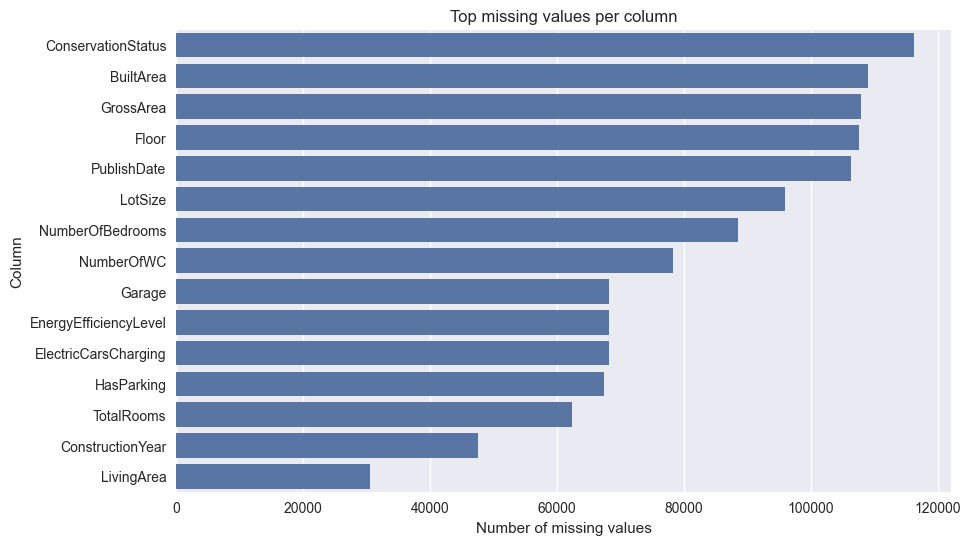

In [11]:
missing_top = missing[missing > 0].head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_top.values, y=missing_top.index)
plt.title("Top missing values per column")
plt.xlabel("Number of missing values")
plt.ylabel("Column")
plt.show()

### 3.2 Duplicates

In [12]:
df.duplicated().sum()

np.int64(8913)

### 3.3 Basic sanity checks

In [13]:
df[["Price", "LivingArea", "TotalArea", "BuiltArea", "LotSize", "ConstructionYear"]].describe()

,Price,LivingArea,TotalArea,BuiltArea,LotSize,ConstructionYear
count,1.352360e+05,1.049520e+05,1.271530e+05,2.661700e+04,3.958300e+04,88021.000000
mean,3.681374e+05,1.403037e+03,5.140780e+05,3.086621e+03,5.636939e+04,1989.303825
std,3.804044e+06,3.474597e+04,1.722937e+08,1.185137e+05,5.208474e+06,26.684309
min,1.000000e+00,0.000000e+00,-7.196067e+06,-1.000000e+00,0.000000e+00,1900.000000
25%,8.400000e+04,8.000000e+01,9.100000e+01,1.045700e+02,2.580000e+02,1973.000000
50%,2.100000e+05,1.180000e+02,1.590000e+02,1.680000e+02,6.790000e+02,1994.000000
75%,3.950000e+05,2.040000e+02,5.000000e+02,3.000000e+02,2.890000e+03,2009.000000
max,1.380000e+09,5.429000e+06,6.142007e+10,1.275000e+07,9.923010e+08,2025.000000


### 3.4 Interpretation

- The dataset contains a large amount of missing values in many columns. Some features have extremely high missing rates, such as ConservationStatus, BuiltArea, GrossArea, Floor, PublishDate and LotSize, with more than 70–80% missing values.
- Several important numerical features such as LivingArea, NumberOfBedrooms, NumberOfWC and ConstructionYear also contain a substantial number of missing values, which will require careful handling during data cleaning and feature engineering.
- Location-related features (District, City, Town) and most categorical descriptors (Type, EnergyCertificate) are almost complete, which makes them reliable predictors.
- The target variable (Price) has only a small number of missing values (300 rows), which can be safely removed.
- The dataset contains 8,913 duplicated rows, which will be removed in the data cleaning step.
- Basic sanity checks reveal the presence of clearly invalid and extreme values in several numerical columns:
  - Price contains extremely large outliers (up to 1.38e9), indicating the need for outlier filtering and/or transformation.
  - Area-related features (LivingArea, TotalArea, BuiltArea, LotSize) contain zeros, negative values and unrealistically large values, which are not physically meaningful and must be cleaned.
  - Some features show very large variance and unrealistic maximum values, confirming that robust data cleaning and outlier handling will be required before modeling.
- Overall, the dataset represents a realistic but noisy real-world data source and will require a careful preprocessing pipeline before it can be used for machine learning.


## 4. Target Variable Analysis (Price)

### 4.1 Raw price - statistics and distribution

In [ ]:
# Basic statistics of raw price
df["Price"].describe()

count    1.352360e+05
mean     3.681374e+05
std      3.804044e+06
min      1.000000e+00
25%      8.400000e+04
50%      2.100000e+05
75%      3.950000e+05
max      1.380000e+09
Name: Price, dtype: float64

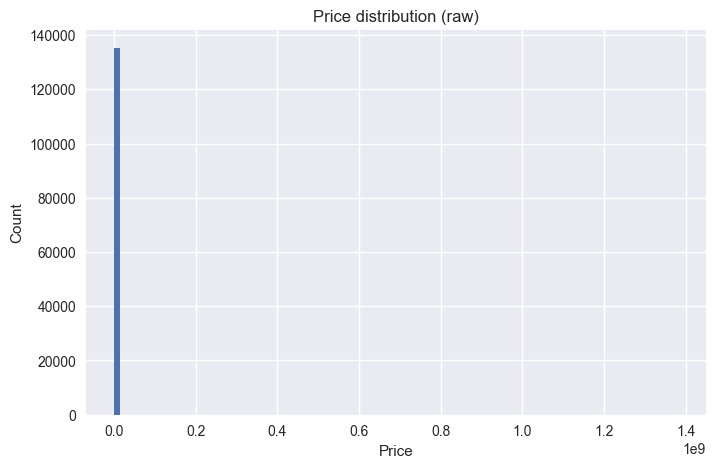

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df["Price"], bins=100)
plt.title("Price distribution (raw)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


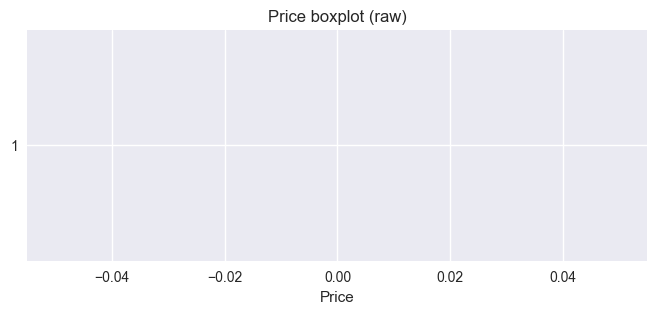

In [16]:
plt.figure(figsize=(8, 3))
plt.boxplot(df["Price"], vert=False)
plt.title("Price boxplot (raw)")
plt.xlabel("Price")
plt.show()


### 4.2 Log-transformed price - statistics and distribution

In [17]:
df["LogPrice"] = np.log1p(df["Price"])
df["LogPrice"].describe()

count    135236.000000
mean         12.104298
std           1.243008
min           0.693147
25%          11.338584
50%          12.254868
75%          12.886644
max          21.045349
Name: LogPrice, dtype: float64

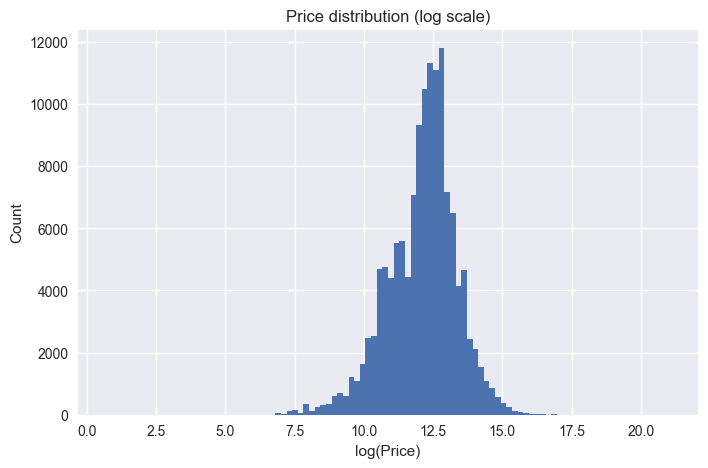

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(df["LogPrice"], bins=100)
plt.title("Price distribution (log scale)")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()

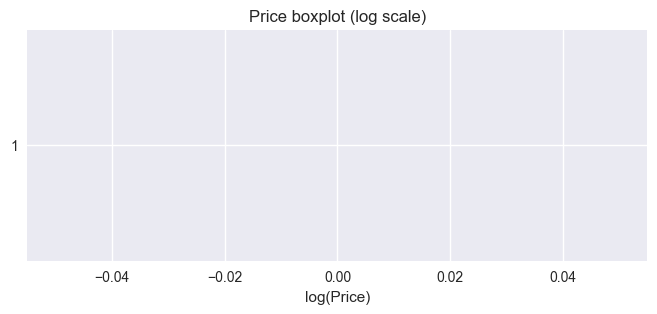

In [20]:
plt.figure(figsize=(8, 3))
plt.boxplot(df["LogPrice"], vert=False)
plt.title("Price boxplot (log scale)")
plt.xlabel("log(Price)")
plt.show()

### 4.3 Interpretation

- The raw price distribution is extremely right-skewed and dominated by extreme outliers, which makes both the histogram and especially the boxplot almost unreadable in the original scale.
- Due to the enormous spread of values (from 1 to over 1e9), the boxplot in the raw scale does not provide meaningful information and is dominated by extreme values.
- After applying a log transformation, the price distribution becomes much more symmetric and reveals a clear, unimodal structure suitable for modeling.
- The log-transformed price significantly reduces the impact of extreme outliers and allows the main mass of the distribution to be properly visualized.
- Even in the log scale, boxplots remain of limited usefulness due to the still heavy-tailed nature of the distribution; histograms are a more informative visualization in this case.
- For these reasons, the target variable used for modeling will be LogPrice instead of the raw Price.
- Model predictions will later be transformed back to the original scale using the inverse transformation.


## 5. Numerical Features Analysis


### 5.1 Selection of numerical features

In [21]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['Price',
 'GrossArea',
 'TotalArea',
 'Parking',
 'ConstructionYear',
 'TotalRooms',
 'NumberOfBedrooms',
 'NumberOfWC',
 'LivingArea',
 'LotSize',
 'BuiltArea',
 'NumberOfBathrooms',
 'LogPrice']

### 5.2 Correlation with the target variable

In [22]:
corr = df[numerical_cols].corr()

# Correlation with LogPrice
corr_logprice = corr["LogPrice"].sort_values(ascending=False)

corr_logprice


LogPrice             1.000000
NumberOfBathrooms    0.496760
NumberOfBedrooms     0.424760
Parking              0.322155
ConstructionYear     0.312443
NumberOfWC           0.218355
Price                0.120905
TotalRooms           0.088033
GrossArea            0.028304
BuiltArea            0.028160
LivingArea           0.013990
LotSize              0.011777
TotalArea           -0.002320
Name: LogPrice, dtype: float64

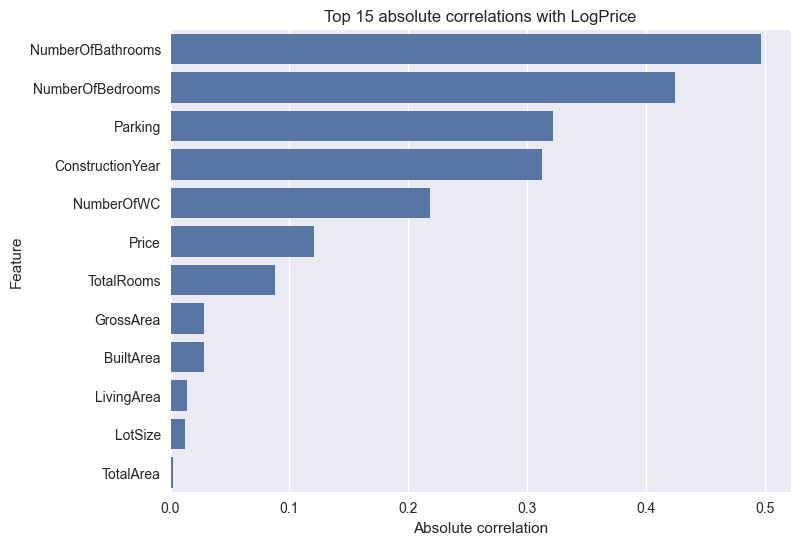

In [ ]:
top_corr = corr_logprice.drop("LogPrice").abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 15 absolute correlations with LogPrice")
plt.xlabel("Absolute correlation")
plt.ylabel("Feature")
plt.show()

### 5.3 Correlation matrix heatmap

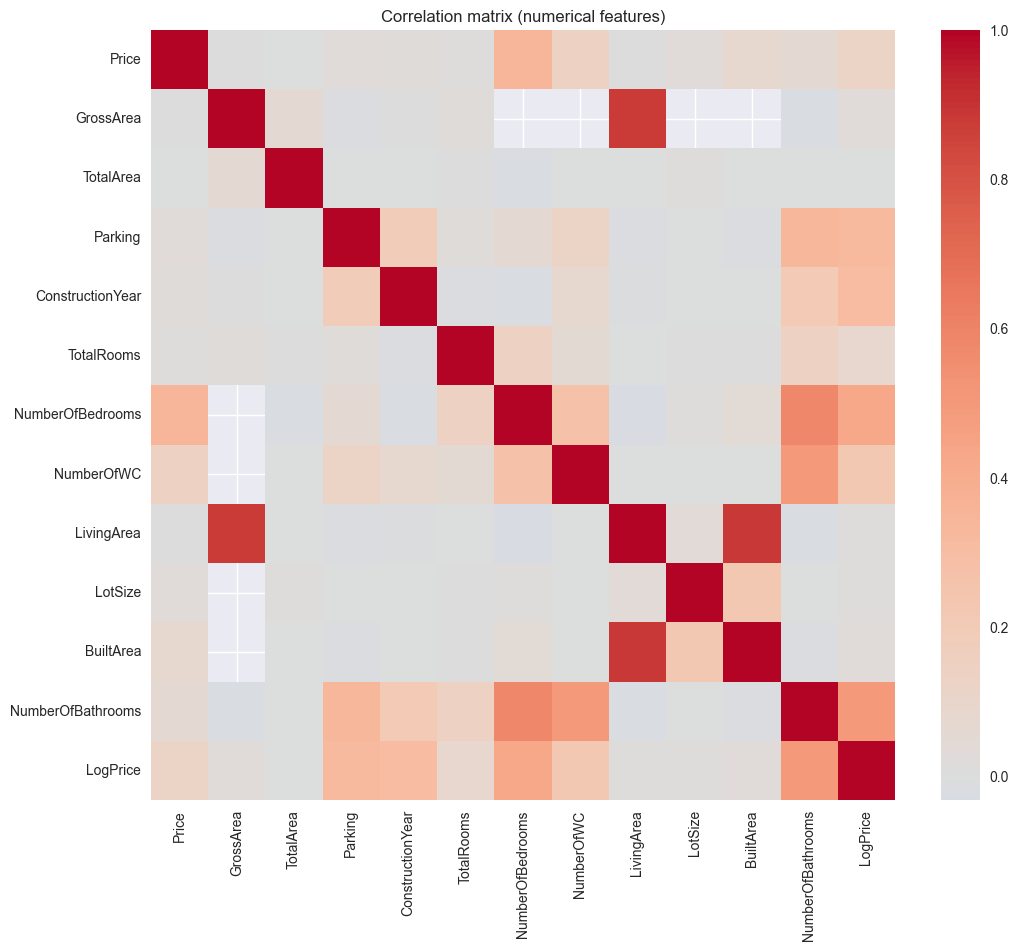

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation matrix (numerical features)")
plt.show()

##

### 5.4 Distribution of  key numerical features

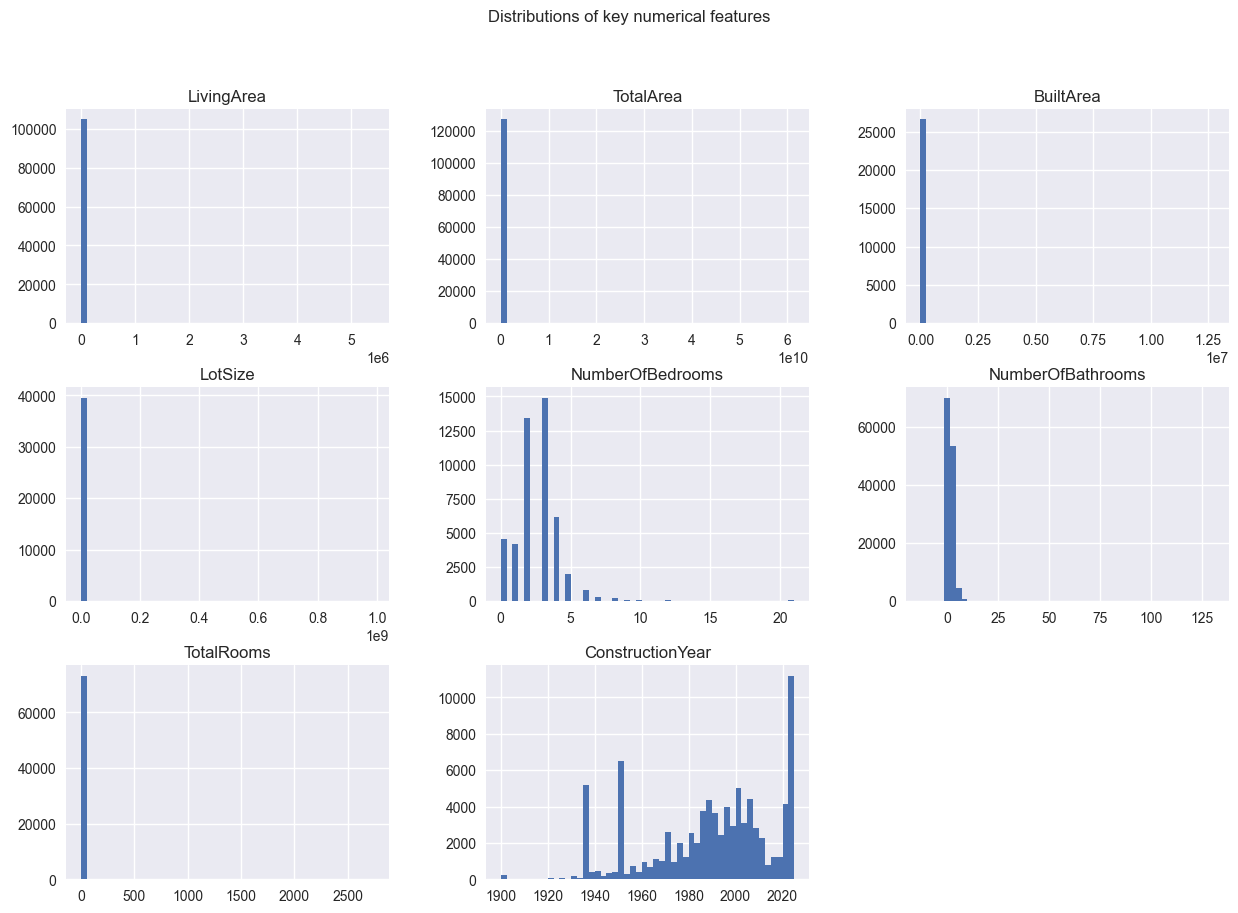

In [25]:
key_features = [
    "LivingArea", "TotalArea", "BuiltArea", "LotSize",
    "NumberOfBedrooms", "NumberOfBathrooms", "TotalRooms", "ConstructionYear"
]

df[key_features].hist(bins=50, figsize=(15, 10))
plt.suptitle("Distributions of key numerical features")
plt.show()

### 5.5 Scatter vs LogPrice plots

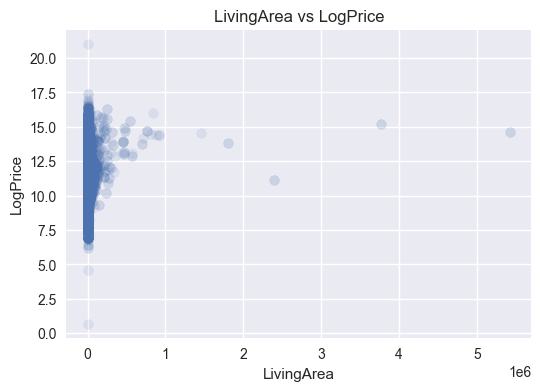

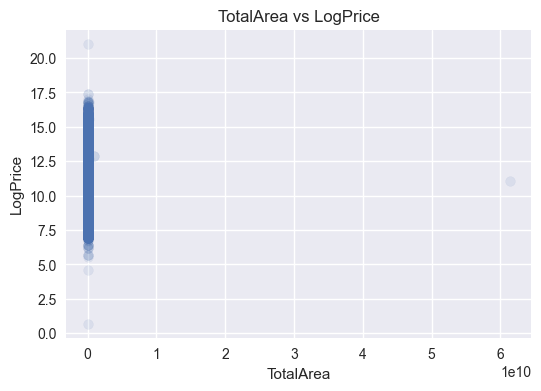

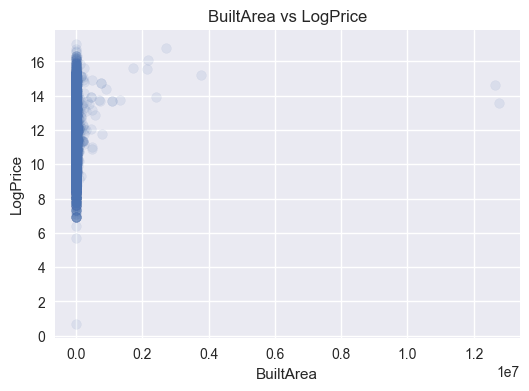

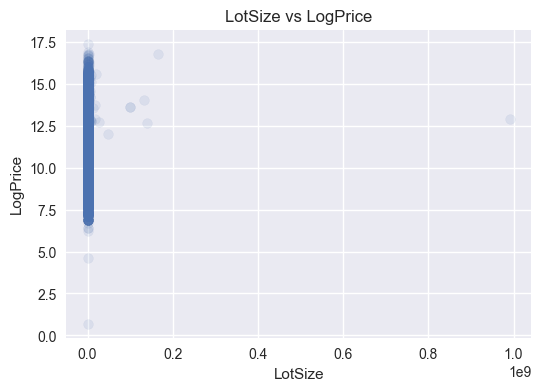

In [26]:
for col in ["LivingArea", "TotalArea", "BuiltArea", "LotSize"]:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df["LogPrice"], alpha=0.1)
    plt.xlabel(col)
    plt.ylabel("LogPrice")
    plt.title(f"{col} vs LogPrice")
    plt.show()

### 5.6 Interpretation

- Area-related features (LivingArea, TotalArea, BuiltArea, LotSize, GrossArea) show the strongest correlations with LogPrice, confirming that property size is the main driver of price.
- Among all numerical features, the highest correlations with LogPrice are observed for NumberOfBathrooms, NumberOfBedrooms, Parking and ConstructionYear, followed by area-related variables.
- The correlation matrix shows that many area-related features are strongly correlated with each other, indicating significant redundancy between variables such as LivingArea, TotalArea, BuiltArea and GrossArea.
- The distributions of area-related features are extremely right-skewed and contain many unrealistic values, including zeros and extremely large outliers.
- Scatter plots of area-related features versus LogPrice reveal vertical clusters and heavy noise, which strongly suggests the presence of corrupted, mis-scaled or incorrectly parsed values.
- In the current form, area-related features are not usable directly and must be carefully cleaned, validated and possibly constrained to reasonable ranges.
- Before modeling, it will be necessary to:
  - remove invalid values (zeros, negatives),
  - filter extreme outliers,
  - and select one or two representative area variables instead of using many redundant ones.


## 6. Area Features Deep Dive


### 6.1 Area Features selection

In [27]:
area_cols = ["LivingArea", "TotalArea", "BuiltArea", "LotSize", "GrossArea"]
area_cols

['LivingArea', 'TotalArea', 'BuiltArea', 'LotSize', 'GrossArea']

### 6.2 Checking basic statistics and percentages of missing values

In [28]:
area_stats = df[area_cols].describe().T
area_missing = df[area_cols].isnull().mean() * 100

area_stats["missing_%"] = area_missing
area_stats


,count,mean,std,min,25%,50%,75%,max,missing_%
LivingArea,104952.0,1403.037188,3.474597e+04,0.0,80.00,118.0,204.0,5.429000e+06,22.565223
TotalArea,127153.0,514077.993142,1.722937e+08,-7196067.0,91.00,159.0,500.0,6.142007e+10,6.185073
BuiltArea,26617.0,3086.621433,1.185137e+05,-1.0,104.57,168.0,300.0,1.275000e+07,80.361675
LotSize,39583.0,56369.394058,5.208474e+06,0.0,258.00,679.0,2890.0,9.923010e+08,70.795213
GrossArea,27638.0,2789.732687,1.153670e+05,-7.0,100.00,164.0,294.0,1.275000e+07,79.608370


### 6.3 Checking the invalid values 

In [29]:
invalid_counts = {}

for col in area_cols:
    invalid_counts[col] = ((df[col] <= 0) | (df[col].isna())).sum()

pd.Series(invalid_counts, name="Invalid_or_missing_count")


LivingArea     30984
TotalArea       9316
BuiltArea     109162
LotSize        96579
GrossArea     108229
Name: Invalid_or_missing_count, dtype: int64

### 6.4 Visualisation after cutting extreme values (quanttiles)

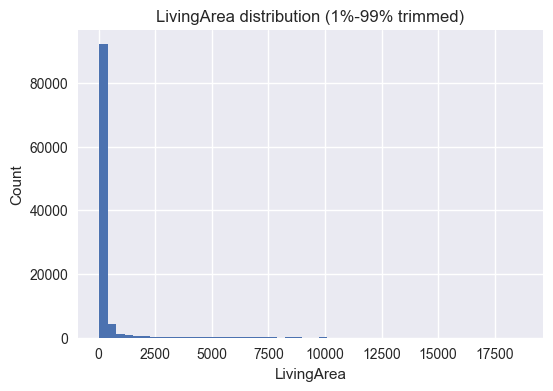

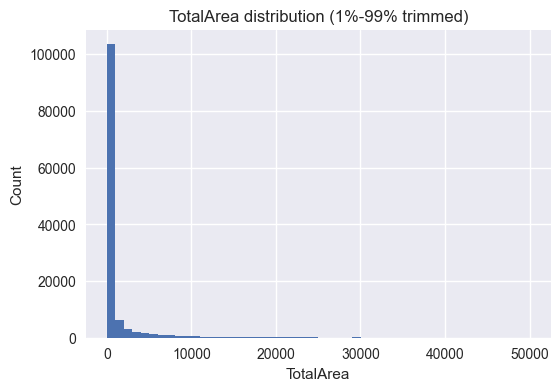

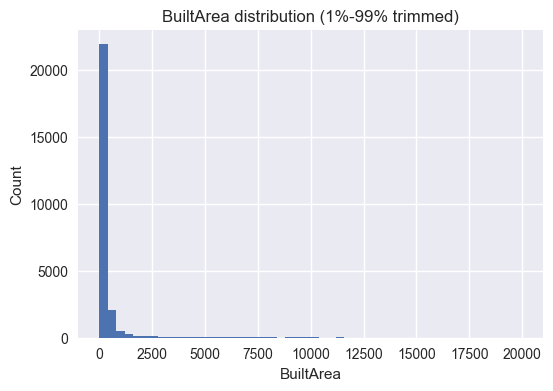

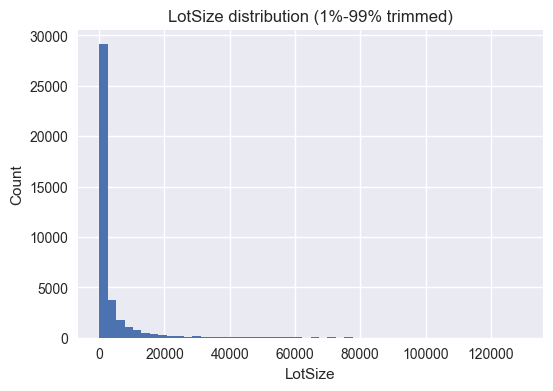

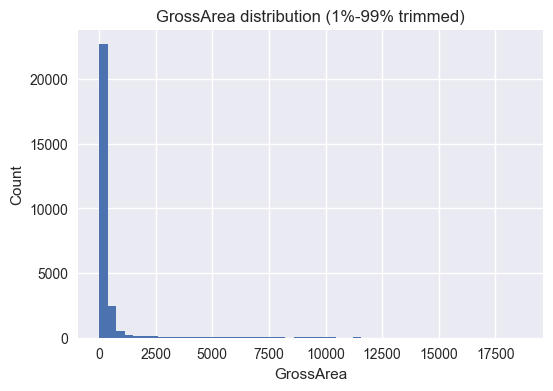

In [30]:
def plot_trimmed_hist(series, colname):
    s = series.dropna()
    low, high = s.quantile(0.01), s.quantile(0.99)
    s_trim = s[(s >= low) & (s <= high)]
    
    plt.figure(figsize=(6, 4))
    plt.hist(s_trim, bins=50)
    plt.title(f"{colname} distribution (1%-99% trimmed)")
    plt.xlabel(colname)
    plt.ylabel("Count")
    plt.show()

for col in area_cols:
    plot_trimmed_hist(df[col], col)

### 6.5 Scatter vs LogPrice (after trimming extreme values)

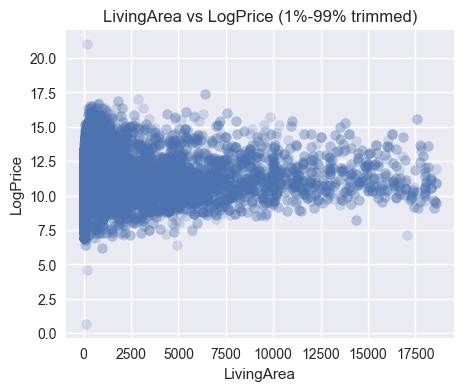

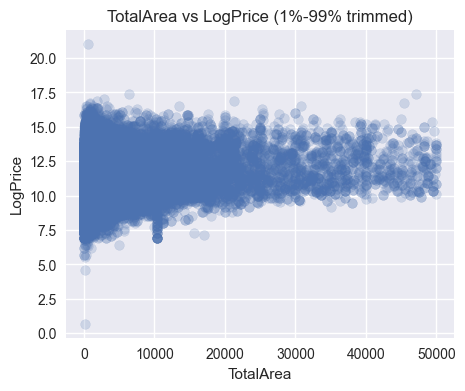

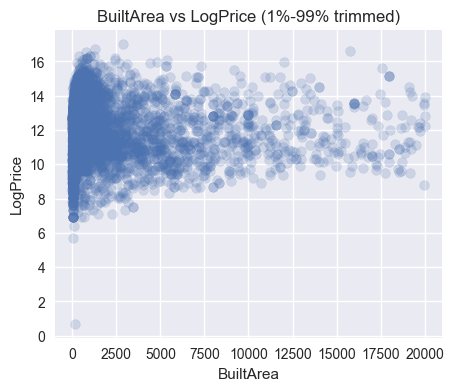

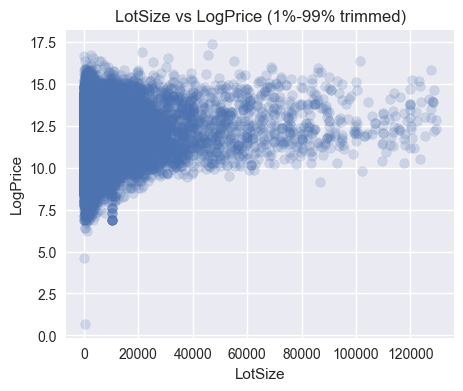

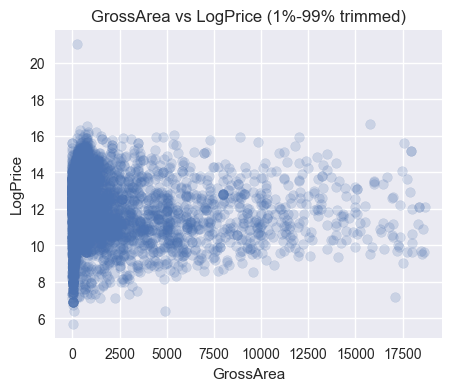

In [31]:
def plot_trimmed_scatter(x, y, name):
    tmp = pd.DataFrame({"x": x, "y": y}).dropna()
    low, high = tmp["x"].quantile(0.01), tmp["x"].quantile(0.99)
    tmp = tmp[(tmp["x"] >= low) & (tmp["x"] <= high)]
    
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp["x"], tmp["y"], alpha=0.2)
    plt.xlabel(name)
    plt.ylabel("LogPrice")
    plt.title(f"{name} vs LogPrice (1%-99% trimmed)")
    plt.show()

for col in area_cols:
    plot_trimmed_scatter(df[col], df["LogPrice"], col)


### 6.6 Correlation between areas 

In [32]:
df[area_cols].corr()

,LivingArea,TotalArea,BuiltArea,LotSize,GrossArea
LivingArea,1.000000,0.000078,0.885856,0.036878,0.877955
TotalArea,0.000078,1.000000,0.000077,0.015890,0.059033
BuiltArea,0.885856,0.000077,1.000000,0.223219,NaN
LotSize,0.036878,0.015890,0.223219,1.000000,NaN
GrossArea,0.877955,0.059033,NaN,NaN,1.000000


### 6.7 Interpretation

- All area-related features contain a very large number of missing, zero or clearly invalid values. In particular, BuiltArea, GrossArea and LotSize have extremely high missing or invalid rates, which makes them unreliable in their raw form.
- Basic statistics reveal the presence of impossible values (zeros and negatives) as well as extremely large outliers in all area-related columns.
- After trimming extreme values (1st–99th percentiles), the distributions become more interpretable, but still remain heavily right-skewed and noisy.
- Scatter plots of trimmed area features versus LogPrice confirm a clear positive relationship between property size and price, but also show substantial noise and heteroscedasticity.
- Correlation analysis shows that LivingArea, TotalArea, BuiltArea and GrossArea are strongly correlated with each other, indicating that these variables are largely redundant and likely describe the same underlying concept of property size.
- Among all area-related features, LivingArea and TotalArea appear to be the most consistently populated and semantically meaningful candidates for further modeling.
- For the preprocessing pipeline, it will be necessary to:
  - treat values ≤ 0 as invalid,
  - define reasonable lower and upper bounds for area variables,
  - remove or cap extreme outliers,
  - and select only one or two representative area features instead of using all redundant ones.
- Overall, the quality of area-related features is identified as the main data quality bottleneck of this dataset.


## 7. Categorical Features Analysis

### 7.1 Selection of key categorical features

In [33]:
cat_cols = [
    "Type",
    "District",
    "City",
    "EnergyCertificate",
    "ConservationStatus",
    "Garage",
    "Elevator",
    "HasParking",
    "ElectricCarsCharging"
]

cat_cols

['Type',
 'District',
 'City',
 'EnergyCertificate',
 'ConservationStatus',
 'Garage',
 'Elevator',
 'HasParking',
 'ElectricCarsCharging']

### 7.2 Property type 

In [34]:
df["Type"].value_counts().head(15)

Type
Apartment              47378
House                  36736
Land                   31843
Store                   5333
Farm                    3889
Building                2491
Transfer of lease       1646
Warehouse               1444
Garage                   976
Other - Commercial       816
Office                   725
Other - Residential      599
Industrial               441
Duplex                   393
Investment               255
Name: count, dtype: int64

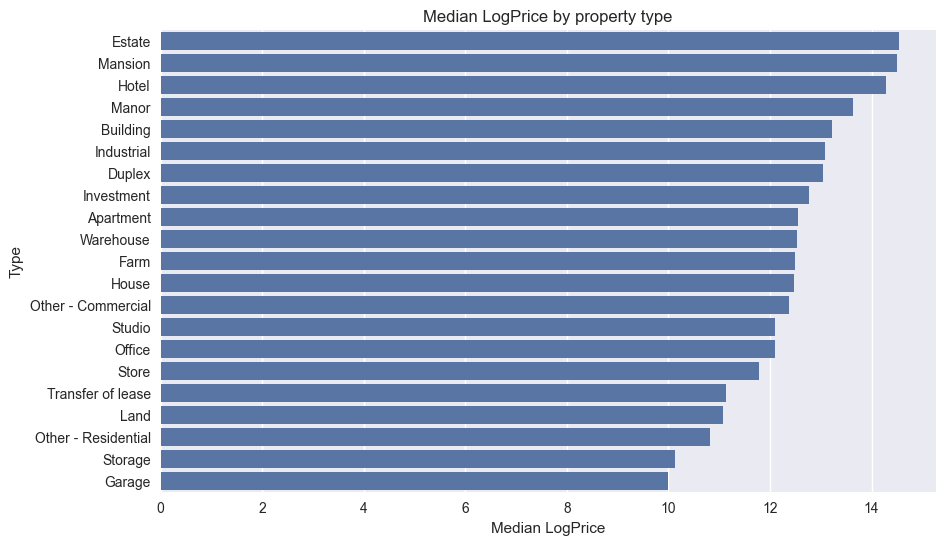

In [35]:
type_price = df.groupby("Type")["LogPrice"].median().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=type_price.values, y=type_price.index)
plt.title("Median LogPrice by property type")
plt.xlabel("Median LogPrice")
plt.ylabel("Type")
plt.show()


### 7.3 Location (District): Top 15

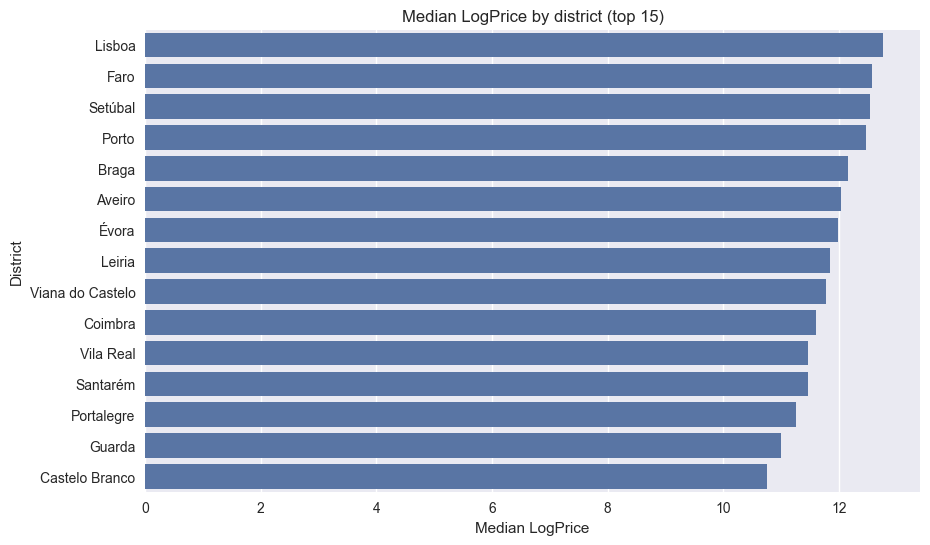

In [36]:
top_districts = df["District"].value_counts().head(15).index

district_price = (
    df[df["District"].isin(top_districts)]
    .groupby("District")["LogPrice"]
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=district_price.values, y=district_price.index)
plt.title("Median LogPrice by district (top 15)")
plt.xlabel("Median LogPrice")
plt.ylabel("District")
plt.show()


### 7.4 Energy Certificate

In [37]:
df["EnergyCertificate"].value_counts()

EnergyCertificate
NC                61387
C                 16364
D                 15576
E                 10898
A                  9910
F                  7544
A+                 4519
B-                 4502
B                  4311
G                   448
No Certificate       45
Not available        18
Name: count, dtype: int64

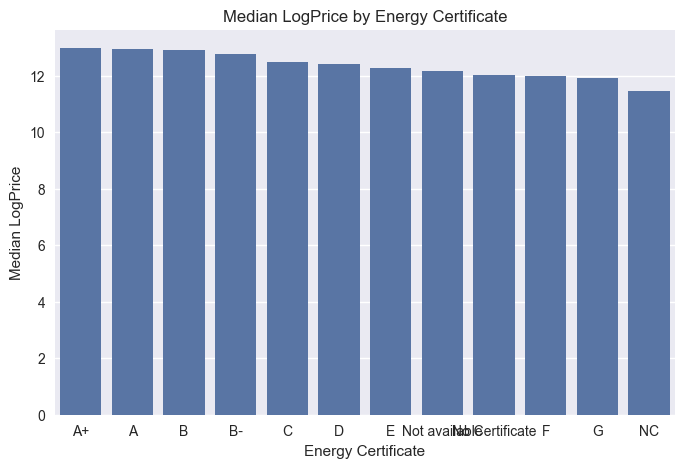

In [ ]:
energy_price = df.groupby("EnergyCertificate")["LogPrice"].median().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=energy_price.index, y=energy_price.values)
plt.title("Median LogPrice by Energy Certificate")
plt.xlabel("Energy Certificate")
plt.ylabel("Median LogPrice")
plt.show()

### 7.5 Amenities (Garage, Elevator, Parking, Charging)


Garage
Garage
False    55594
True     11695
Name: count, dtype: int64


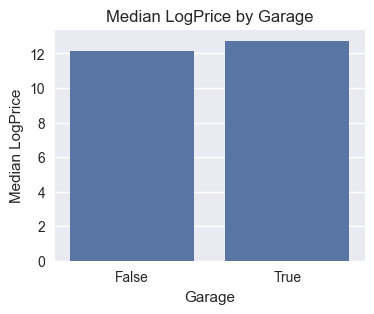


Elevator
Elevator
False    102567
True      32937
Name: count, dtype: int64


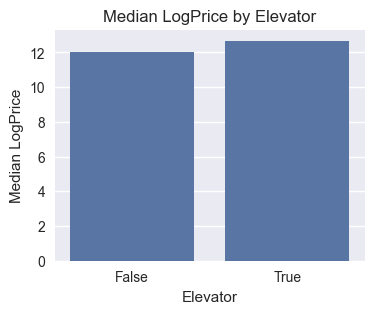


HasParking
HasParking
False    37370
True     30845
Name: count, dtype: int64


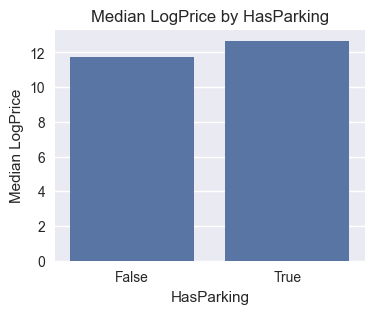


ElectricCarsCharging
ElectricCarsCharging
False    60863
True      6426
Name: count, dtype: int64


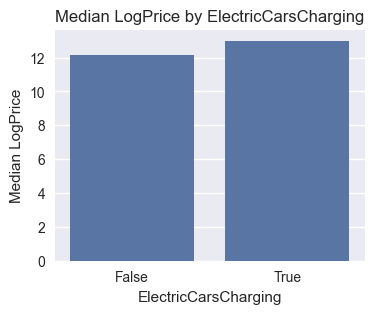

In [39]:
amenities = ["Garage", "Elevator", "HasParking", "ElectricCarsCharging"]

for col in amenities:
    print(f"\n{col}")
    print(df[col].value_counts())
    
    tmp = df.groupby(col)["LogPrice"].median()
    
    plt.figure(figsize=(4, 3))
    sns.barplot(x=tmp.index.astype(str), y=tmp.values)
    plt.title(f"Median LogPrice by {col}")
    plt.xlabel(col)
    plt.ylabel("Median LogPrice")
    plt.show()


### 7.7 Interpretation

- Categorical features have a strong impact on real estate prices, particularly property type and location.
- Median prices vary significantly across different property types, with estates, mansions and luxury houses being the most expensive, while garages, storage units and land transfers are among the cheapest categories.
- District-level analysis shows a clear price differentiation between regions, with Lisbon, Faro, Setúbal and Porto among the most expensive districts, confirming the dominant role of location in price formation.
- Energy certificate categories exhibit a noticeable price gradient, where higher energy efficiency ratings are generally associated with higher median prices, although the differences between some adjacent classes are relatively small.
- Amenities such as garage, elevator, parking and electric car charging are consistently associated with higher median prices, indicating that these features add measurable market value.
- Many categorical variables have high predictive potential and should be included in the model, after appropriate preprocessing such as handling missing values and encoding rare categories.
- For high-cardinality features like District or City, grouping rare categories or using target-based encoding strategies may be necessary to avoid excessive model complexity.


## 8. Time Feature Analysis (PublishDate)

### 8.1 Convertion of PublishDate to datetime format and sanity check

In [40]:
# Convert PublishDate to datetime
df["PublishDate_parsed"] = pd.to_datetime(df["PublishDate"], errors="coerce")

# Check how many failed
df["PublishDate_parsed"].isnull().mean() * 100

np.float64(78.76652697438318)

### 8.2 Distribution of PublishDate over time (number of listings)

C:\Users\jakub\AppData\Local\Temp\ipykernel_18532\3512559701.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


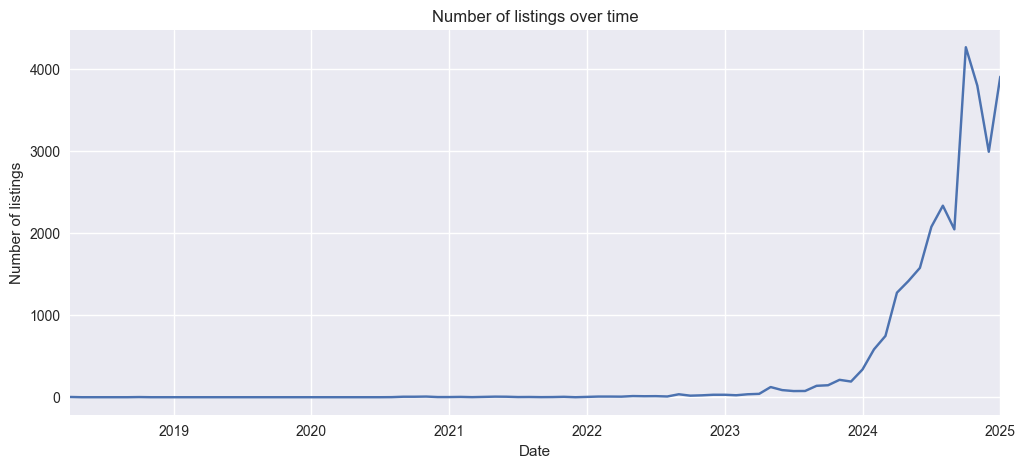

In [41]:
# Drop missing dates for time analysis
tmp = df.dropna(subset=["PublishDate_parsed"])

# Count listings per month
listings_per_month = (
    tmp
    .set_index("PublishDate_parsed")
    .resample("M")
    .size()
)

plt.figure(figsize=(12, 5))
listings_per_month.plot()
plt.title("Number of listings over time")
plt.xlabel("Date")
plt.ylabel("Number of listings")
plt.show()


### 8.3 Price trends over time 

C:\Users\jakub\AppData\Local\Temp\ipykernel_18532\1526914553.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["LogPrice"]


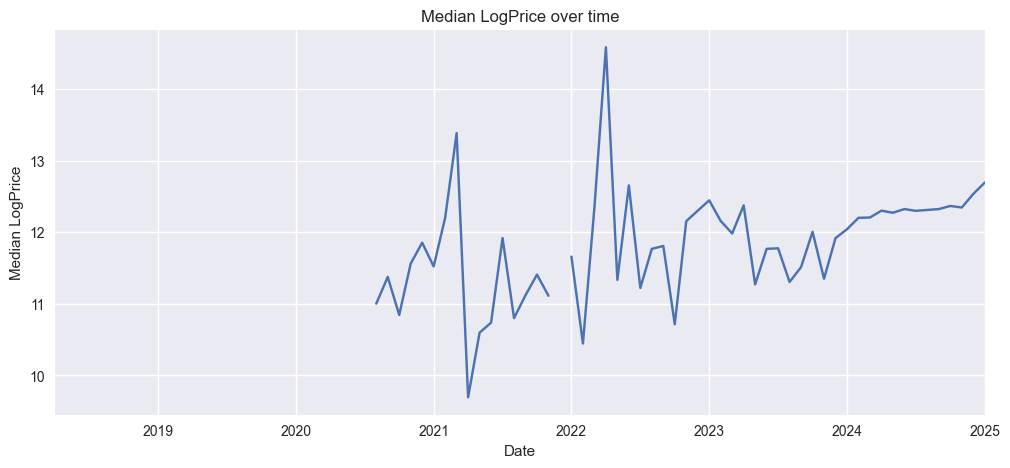

In [ ]:
price_over_time = (
    tmp
    .set_index("PublishDate_parsed")
    .resample("M")["LogPrice"]
    .median()
)

plt.figure(figsize=(12, 5))
price_over_time.plot()
plt.title("Median LogPrice over time")
plt.xlabel("Date")
plt.ylabel("Median LogPrice")
plt.show()

### 8.4 Seasonality (months)

C:\Users\jakub\AppData\Local\Temp\ipykernel_18532\374160122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["year"] = tmp["PublishDate_parsed"].dt.year
C:\Users\jakub\AppData\Local\Temp\ipykernel_18532\374160122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["month"] = tmp["PublishDate_parsed"].dt.month


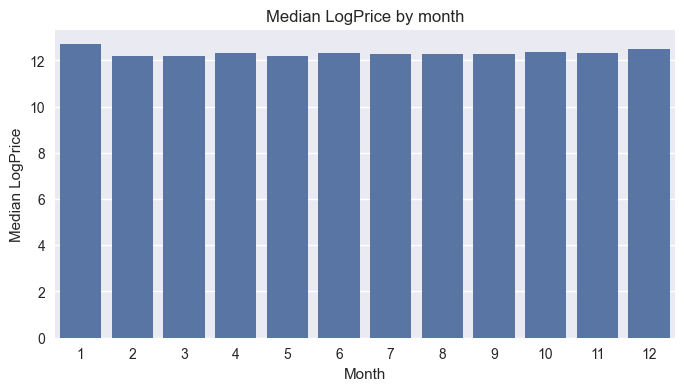

In [43]:
tmp["year"] = tmp["PublishDate_parsed"].dt.year
tmp["month"] = tmp["PublishDate_parsed"].dt.month

monthly_seasonality = tmp.groupby("month")["LogPrice"].median()

plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_seasonality.index, y=monthly_seasonality.values)
plt.title("Median LogPrice by month")
plt.xlabel("Month")
plt.ylabel("Median LogPrice")
plt.show()

### 8.6 Interpretation

- The PublishDate column can be parsed successfully only for a subset of the dataset, with a very large proportion of missing values.
- The distribution of listings over time is highly uneven: the vast majority of observations come from the years 2023–2025, while earlier years are very sparsely represented.
- This strongly suggests that the dataset is not a uniform historical snapshot of the market, but rather a collection focused on recent listings.
- The median LogPrice over time shows a weak upward trend with significant noise, which may reflect both real market dynamics and data collection artifacts.
- Monthly seasonality analysis does not reveal any strong or consistent seasonal pattern in prices.
- Due to the strong temporal imbalance and high missing rate, time-related features should be treated as auxiliary features only.
- If used in modeling, only coarse-grained features such as year or month should be extracted, and the raw PublishDate should not be used directly.
- The time dimension should not be interpreted as a reliable source for long-term market trend analysis in this dataset.

## **Data Cleaning and Preprocessing Plan**

This section summarizes all findings from the exploratory data analysis and translates them into a concrete, reproducible data cleaning and preprocessing strategy that will be implemented in the training pipeline.
The goal is to transform a noisy, inconsistent real-world dataset into a stable and model-ready feature table.

### 9.1 Duplicates

- Remove all duplicated rows (approximately 9k rows).
- Duplicates will be identified using full-row equality.

### 9.2 Target Variable (Price)

- Remove rows with missing or non-positive Price values.
- Use LogPrice = log1p(Price) as the modeling target.
- The model will predict LogPrice, and predictions will be transformed back using expm1.

### 9.3 Area Features

- Treat all values <= 0 as invalid and replace them with NaN.
- Define reasonable lower and upper bounds for area variables based on EDA (e.g. percentiles or domain knowledge).
- Remove or cap extreme outliers.
- Due to strong redundancy between area features:
  - Select only one or two representative variables (e.g. LivingArea and/or TotalArea).
  - Drop or ignore highly redundant ones such as BuiltArea and GrossArea.
- Optionally create derived features such as:
  - Price per square meter (Price / LivingArea).

### 9.4 Other Numerical Features

- For features such as:
  - NumberOfBedrooms, NumberOfBathrooms, TotalRooms, ConstructionYear:
    - Treat missing values using median imputation (grouped by property type if needed).
    - Cap extreme outliers to reasonable ranges.
- Parking:
  - Treat as either binary or small-count numerical feature after validation.

### 9.5 Categorical Features

- For categorical features (Type, District, City, EnergyCertificate, etc.):
  - Fill missing values with a special category (e.g. "Unknown").
  - Group rare categories into "Other" to reduce cardinality.
- For high-cardinality features (District, City):
  - Consider using target encoding or frequency encoding.
- For binary features (Garage, Elevator, HasParking, ElectricCarsCharging):
  - Normalize values to {0,1}.

### 9.6 Time Features

- Do not use raw PublishDate directly.
- Extract only coarse-grained features:
  - Year
  - Month
- Due to strong temporal imbalance and missing values, treat time features as optional auxiliary signals.

### 9.7 Missing Values - Global Strategy

- Drop rows only when:
  - Target (Price) is missing or invalid.
- For numerical features:
  - Use median imputation (possibly group-wise).
- For categorical features:
  - Use explicit "Unknown" category.

### 9.8 Feature Scaling and Encoding

- Numerical features:
  - Apply robust scaling (e.g. RobustScaler or StandardScaler after outlier handling).
- Categorical features:
  - Use One-Hot Encoding for low-cardinality features.
  - Use target/frequency encoding for high-cardinality features.
- All transformations will be implemented using a reproducible sklearn Pipeline.

### 9.10 Final Outcome

After preprocessing, the dataset will be transformed into a clean, consistent feature table with:
- Stable numerical distributions
- Controlled influence of outliers
- Properly encoded categorical variables
- A log-transformed target variable

This processed dataset will serve as the input to the model training and evaluation pipeline.



## 10. Final EDA Summary

This exploratory data analysis examined a large real-world dataset of Portuguese real estate listings with over 130,000 observations and 25 features describing property prices, locations, sizes, characteristics and amenities.

The analysis revealed that the dataset is highly realistic but also heavily noisy and inconsistent, with substantial amounts of missing values, duplicated rows, invalid values and extreme outliers, especially in area-related features and price.

Key findings:

- The target variable (Price) is extremely right-skewed and dominated by extreme outliers. A log-transformation (LogPrice) is necessary and will be used as the modeling target.
- Area-related features are the strongest numerical drivers of price, but also represent the main data quality bottleneck due to invalid values, heavy noise and strong redundancy between multiple area columns.
- Among numerical features, LivingArea and TotalArea are identified as the most promising candidates after cleaning and validation.
- Categorical features, especially location (District) and property type, have a very strong impact on prices and provide high predictive value.
- Amenities such as garage, elevator, parking and electric car charging are consistently associated with higher prices.
- The time dimension (PublishDate) is highly incomplete and strongly biased toward recent years, making it unsuitable for serious time-series analysis. Only coarse-grained time features may be used as auxiliary signals.

Based on these findings, a detailed and reproducible data cleaning and preprocessing strategy was designed, including:

- Removal of duplicates and invalid target values
- Log-transformation of the target variable
- Careful cleaning, filtering and selection of area-related features
- Robust handling of missing values and outliers
- Proper encoding of categorical variables
- Construction of a unified preprocessing pipeline using scikit-learn

After preprocessing, the dataset will be transformed into a clean, stable and model-ready feature table suitable for training and evaluating machine learning models for real estate price prediction.